<a href="https://colab.research.google.com/github/vimukthijayasanka/Artificial-Neural-Networks/blob/main/Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight?select=Training+set.csv')

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [ ]:
data = pd.read_csv('male-female-height-and-weight/Test set.csv')

In [ ]:
data.head(10)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
5,149.863914,66.055655,Female
6,191.173088,83.631339,Male
7,135.407174,47.014457,Female
8,184.995763,71.935828,Male
9,179.990887,65.920795,Male


In [ ]:
data.shape

(205, 3)

In [ ]:
data.replace({'Sex':{'Male':1, 'Female': 0}},inplace =True)

In [ ]:
data

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0
...,...,...,...
200,155.090314,77.248911,0
201,149.175907,93.231692,1
202,168.030874,63.640623,0
203,172.608090,55.189983,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data = pd.DataFrame(X_scaled, columns=data.columns)

In [ ]:
X = data.drop(columns=['Sex'])
y = data['Sex']

In [ ]:
y = y.astype('int')

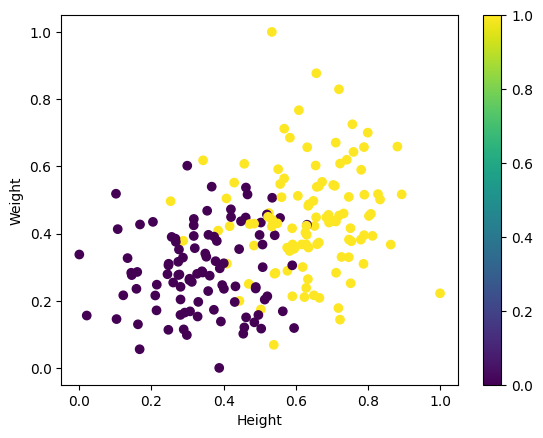

In [ ]:
plt.scatter(X['Height'],X['Weight'],c=y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape


((164, 2), (41, 2))

In [ ]:
#@title Model Build
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,),activation='leaky_relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.6511 - accuracy: 0.5244
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.5366
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.5427
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.5732
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.5976
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6220
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6220
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6585
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7439
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7805
Epoch 11/100
6/6 [===========

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                192       
                                                                 
 dense_39 (Dense)            (None, 20)                1300      
                                                                 
 dense_40 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1513 (5.91 KB)
Trainable params: 1513 (5.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#@title Model evaluate

model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2728 - accuracy: 0.9024


[0.27280905842781067, 0.9024389982223511]

In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred[:5]

array([[0.1430209 ],
       [0.9823607 ],
       [0.9914655 ],
       [0.26773727],
       [0.9762106 ]], dtype=float32)

In [ ]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [ ]:
#Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result().numpy()

0.0

In [ ]:
#Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result().numpy()

0.0

In [ ]:
history.history

{'loss': [0.6511078476905823,
  0.6425197124481201,
  0.6349942684173584,
  0.6280094385147095,
  0.6194623708724976,
  0.6093568801879883,
  0.6014772057533264,
  0.5934938788414001,
  0.5880878567695618,
  0.5823192000389099,
  0.5760126709938049,
  0.5651254653930664,
  0.553656816482544,
  0.5463127493858337,
  0.5353065729141235,
  0.5242259502410889,
  0.5146753787994385,
  0.5038134455680847,
  0.4899481236934662,
  0.4762480556964874,
  0.4651756286621094,
  0.4526756703853607,
  0.4431309700012207,
  0.4326309561729431,
  0.4226112365722656,
  0.4110682010650635,
  0.40141454339027405,
  0.3921859562397003,
  0.38404059410095215,
  0.37232860922813416,
  0.36338379979133606,
  0.35543468594551086,
  0.348440945148468,
  0.3413841128349304,
  0.3348219394683838,
  0.33077967166900635,
  0.3229389190673828,
  0.32369092106819153,
  0.3141169548034668,
  0.30930718779563904,
  0.3060305416584015,
  0.30280637741088867,
  0.3075157701969147,
  0.3076280355453491,
  0.2954139709472

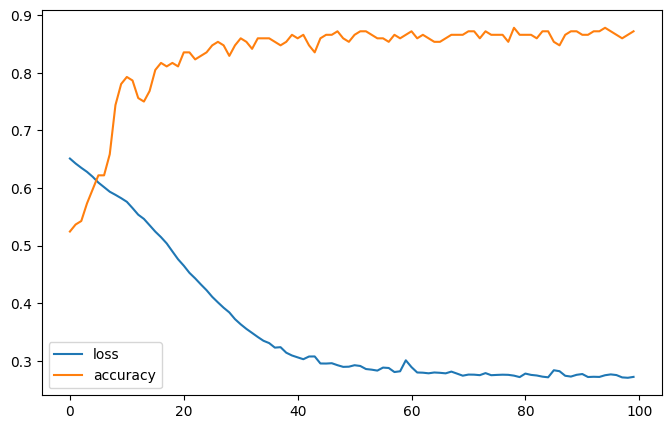

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()